In this lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

Use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best value.

Below is starer code which obtains demo data from Amazon Web Services website:

In [208]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [94]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

In [95]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [231]:
features = ['density', 'sulphates', 'residual_sugar']

In [232]:
df2 = df.copy()

In [233]:
scaler = StandardScaler()

In [234]:
scaler.fit(df2[features])
X = scaler.transform(df2[features])

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, df['high_quality'], stratify=df['high_quality'])

In [236]:
k_range = np.arange(1,51,1)

In [237]:
def gen_knn(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
#     knn.predict_proba(X_test)
    return knn.score(X_test, y_test)

In [238]:
scores = {}
for i in k_range:
    scores[i] = gen_knn(i,X_train, y_train, X_test, y_test)

In [239]:
max(scores.values())

0.82953846153846156

In [240]:
print "Best k"
best = [x[0] for x in scores.items() if x[1] == max(scores.values())]
print best

Best k
[2]


In [241]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predict = knn.predict_proba(X_test)

In [242]:
y_pred = knn.predict(X_test)
y_score = [i[1] for i in predict]

In [243]:
roc_auc_score(y_test, y_score)

0.74369320282083662

     0     1
0  104   215
1   62  1244
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      1306
        1.0       0.63      0.33      0.43       319

avg / total       0.81      0.83      0.81      1625



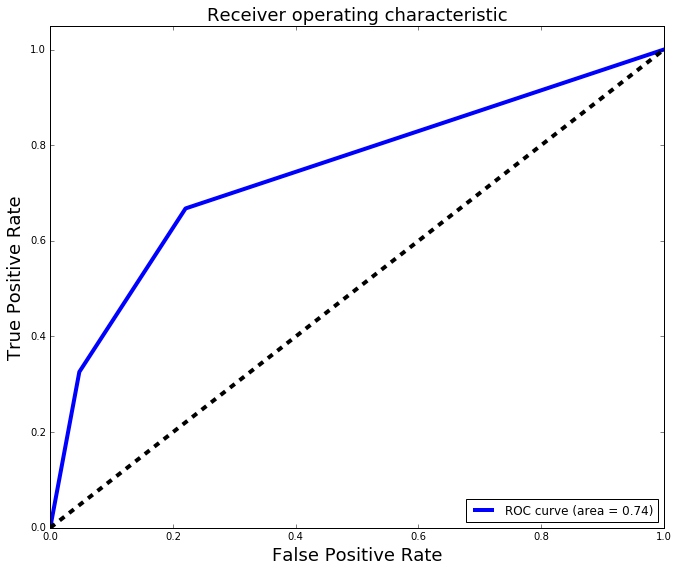

In [244]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat)

print(confusion)
print classification_report(y_test,y_pred)
roc_auc_score(y_test, y_score)

""" Plot AUC"""

# For class 1, find the area under the curve
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [252]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train,y_train)
lr_y_pred = logreg.predict(X_test)
lr_y_score = logreg.decision_function(X_test)

In [253]:
logreg.score(X_test, y_test)

0.80738461538461537

In [254]:
y_pp = pd.DataFrame(logreg.predict_proba(X_test))

In [255]:
y_pp['actual'] = np.array(y_test)

In [256]:
y_pp['threshold-40'] = y_pp[1].map(lambda x: 1 if x > 0.4 else 0)

In [257]:
lr_y_pred = y_pp['threshold-40']

    0     1
0  91   228
1  86  1220
             precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      1306
        1.0       0.63      0.33      0.43       319

avg / total       0.81      0.83      0.81      1625

0.764650251792


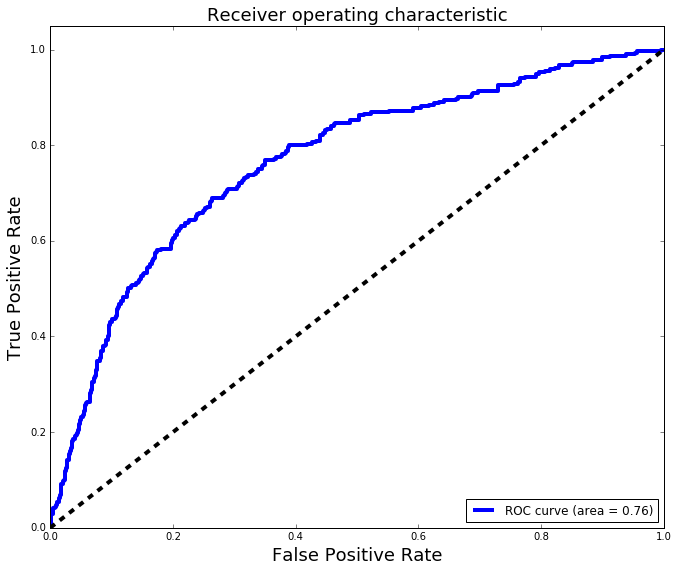

In [258]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(y_test, lr_y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat)

print(confusion)
print classification_report(y_test,y_pred)
print roc_auc_score(y_test, lr_y_score)

""" Plot AUC"""

# For class 1, find the area under the curve
FPR, TPR, _ = roc_curve(y_test, lr_y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()